Описание проекта

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 
Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го
или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, 
определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент
и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «
Для детей младшего возраста» или «Для подростков».



## 1. Знакомство с данными


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv') # Yandex path
except:
    # синтаксис указания пути для Windows
    data = pd.read_csv("C:\DS\YP\S5\games.csv")

In [3]:
# Проверка
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Описание данных**

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг 
компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## 2. Подготовка данных

Приведём название колонок к нижнему регистру.

In [4]:
data = data.rename(columns={'Name' : 'name', 'Platform' : 'platform', 'Year_of_Release' : 'year_of_release', 
                             'Genre' : 'genre', 'NA_sales' : 'na_sales', 'EU_sales' : 'eu_sales', 'JP_sales' : 'jp_sales',
                            'Other_sales' : 'other_sales', 'Critic_Score' : 'critic_score', 'User_Score' : 'user_score',
                            'Rating' : 'rating'})

In [5]:
# проверка переименованных колонк
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Вывод на экран и просмотр значений

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Заменим тип данных в столбцах. В столбцах year_of_release  и user_score, тип данных не соотвевутет хранимим данным. В остальных столбцах всё в порядке.

Начнём с даты. Поменяем тип данных на int, так указан и нам нужен только год выпуска.

Перед тем как менять тип данных на datetime нужно разобраться с пропусками. Пропущенных данных в столбце около 1.5% и они сильно не повлияют вывод, поэтому можем удалить пропущенные данные. Вероятно пропущенные значения появились при ошибке заполнении таблицы. Либо год выпуска игры попросту неизвестен составителям. 

In [8]:
# посмотрим на данные
data['year_of_release'].value_counts(dropna=False)

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
NaN        269
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [9]:
# проверим наличие пропусков
data['year_of_release'].isna().sum()

269

In [10]:
data = data.dropna(subset=['year_of_release'])

In [11]:
# проверим наличие пропусков
data['year_of_release'].isna().sum()

0

In [12]:
# заменяем тип данных c float на int выделим из даты год, т.к. в таблице указан только год 
data['year_of_release'] = data['year_of_release'].astype('int')
#проверка 
data['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int64

Значение в столбце изменим на тип float, т.к. в данных числовые дробные значения. 

In [13]:
# посмотрим на распространённые занчения
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Оюнаружено занчение <b>tbd</b> —TBD (To Be Determined) – это аббревиатура, используемая для обозначения рейтингового показателя компании, который еще не имеет определенной оценки. В нашем случае это значение равно пропущенному значению. Значение tbd имеет тип object и его не получится перевести в тип float кроме как переводом в NaN.

In [14]:
# проверим количество пропусков до замены
data['user_score'].isna().sum()

6607

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

Посмотрим на количество пропусков после замены

In [16]:
data['user_score'].isna().sum()

8983

9125 пропуск - это довольно много, удалить их не получится. Замена может сильно повлиять на анализ, поэтому оставим как есть. Поменяем тим данных. Пропуски скорее всего возникли из-за отсутвия рейтинга или данных о пользоательском рейтинге на игру.

In [17]:
# замена типа данных с object на float
data['user_score'] = data['user_score'].astype('float', errors='ignore')
# проверка
data.dtypes['user_score']

dtype('float64')

Далее следует колонка critic_score. Проверим данные.

In [18]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Проверим на количество пропусков.

In [19]:
data['critic_score'].isna().sum()

8463

Все данные числовые и количественные. Пропусков довольно много, удалять их нельзя. Пропуски скорее всего возникли из-за отсутвия рейтинга или данных о рейтинге критиков на игру. Заменим пропусков скорее всего повлият на анализ, поэтому оставим как есть.

У столбца rating тип данных object, могут быть нечисловые значения. Проверим данные.

In [20]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Почти все значения нечисловые. Категориальный тип данных не заменить. Пропусков слишком много чтобы удалить. Система рейтингов составлена в основном для игр обращающихся на территории Северной Америки, поэтому поставим заглушку, 

In [21]:
# ставим заглушку на место пропущенных значений.
data['rating'] = data['rating'].fillna('unknown')

# проверка
data['rating'].isna().sum()

0

Остались пропуски в колонках с названием игры и жанра. Пропуски скорее всего возникли из-за ошибки заполнения

In [22]:
# проверим колиество пропусков в колонке 'name'
data['name'].isna().sum()

2

In [23]:
# проверим колиество пропусков в колонке 'genre'
data['genre'].isna().sum()

2

Проверим совпадают ли пропущенный жанр и название игры

In [24]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


Совпадают. Пропусков мало. Удаление этих пропущенных значений не повлияет на исследование.

In [25]:
# удаление пропущенных значений
data = data.dropna(subset=['name'])

# проверка
print('пропуски в колонке "name":', data['name'].isna().sum(), '\n')
print('пропуски в колонке "genre":', data['genre'].isna().sum())

пропуски в колонке "name": 0 

пропуски в колонке "genre": 0


Проверим изменения в таблице.

In [26]:
data.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Видно. Что пропуски остались только в колонке 'rating', а типы данных колонок - те что нам нужны

Проверим на наличие дубликатов

In [28]:
data.duplicated().sum()

0

По всем столбцам явных дубликатов нет. Проверим не по всем, а по нескольким столбцам.

In [29]:
#поиск дубликатов по нескольким
data[data.duplicated(['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Удалим выявленный дубликат

In [30]:
#удаление дубликата
data = data.drop(index=16230)


# проверка
data[data.duplicated(['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Подсчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец  'sum_seles'

In [31]:
# суммируем продажи из разных регионов
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# преместим столбец 'sum_sales' между столбцами 'other_sales' и 'critic_score'
data = data[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales', 'critic_score', 'user_score', 'rating']]

# проверка
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown


Много пропущенных значениея в колонках рейтингов - пользовательских('user_score'), критиков('critic_score') и ESRB('rating'). В первых двух пропуски остаили. В последнем заменили значение пропусков на 'unknown', т.к. оставление пропусков может повлиять на результат. Немногочисленные пропуски в остальных данных были удалены.

## 3. Исследовательский анализ данных

Посмотрим сколько игр выпускалось за разные годы.

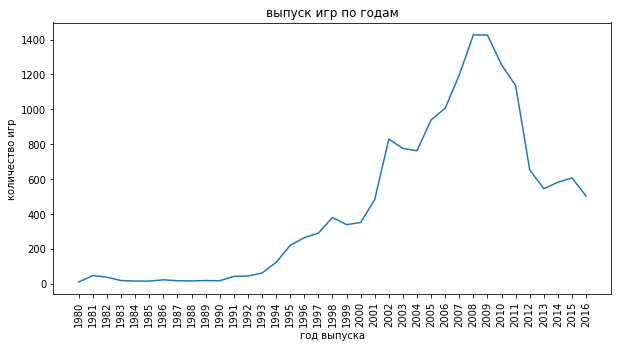

In [32]:
# сгруппируем данне по годам
year_of_release_sorted = data['year_of_release'].value_counts().sort_index()
year_of_release_sorted.plot(kind='line', title='выпуск игр по годам', figsize=(10, 5),rot=90);
plt.xlabel('год выпуска');
plt.ylabel('количество игр');
plt.xticks(np.arange(1980, 2017));

По графику заметно что с середины девяностых количество игр выпускаемых в год стало заметно увеличивается c падением с 1998 по 1999 до уровня середины 1997. Далее бурный рост по 2002 год в котором количество выпускаемых игры в год увеличилось в два раза по сравнению с 1998 годом. После 2002 года снова падение которое закончилось в середине 2004 года. С середины 2004 года бурны рост 2007 год, в котором наблюдается максимальный пик в более чем 1400 выпущенных игр. Далее постепенное снижение вплоть до 2009 года и падение по 2016 год с небольшим локальным ростом в 2013-2015 годах. К 2016 году уровень выпуска компьютерных игр упал до около 500 в год, это уровень 2001 года. Наиболее важны данные с 1993 года. За это время было выпущено большинство игр.

Далее посмотрим как менялись продажи по платформам. Выберем  платформ с наибольшими суммарными продажми и посмотрим на время жизни платформ.

In [33]:
# создаём сводную таблицу с суммой сумарных продаж по каждой из платформ 
platforms = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
platforms.sort_values(by='sum_sales', ascending=False)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Отберём платформ с суммарными продажами копий свыше 200 млн.

In [34]:
# делаем выборку
platforms_200 = platforms.query('sum_sales >= 200').reset_index()

# проверка
platforms_200

,platform,sum_sales
0,3DS,257.81
1,DS,802.78
2,GB,254.43
3,GBA,312.88
4,N64,218.01
5,NES,251.05
6,PC,255.76
7,PS,727.58
8,PS2,1233.56
9,PS3,931.33


In [35]:
# создадим списко с нужными платформамми
plat_200 = []
for platform in platforms_200['platform']:
    plat_200.append(platform)

# проверка
plat_200

['3DS',
 'DS',
 'GB',
 'GBA',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'SNES',
 'Wii',
 'X360',
 'XB']

In [36]:
# отбор по платформам с суммарной продажей более 100млн. копий
data[data['platform'].isin(plat_200)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,sum_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,unknown
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,0.00,NaN,NaN,unknown
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,unknown


In [37]:
# посчитаюм сумму суммарных продаж для каждой платформе и выделим в отдельную таблицу
data_for_platform_sales = data[data['platform'].isin(plat_200)].pivot_table(
    index=['platform', 'year_of_release'], values='sum_sales', aggfunc='sum')

# проверка
data_for_platform_sales = data_for_platform_sales.reset_index()

Вычислим среднее время "жизни" платформы

In [38]:
# найдём среднее от общего количесва дат в таблице и униикальных значений платфорим
len(data_for_platform_sales['year_of_release'])/data_for_platform_sales['platform'].nunique()

10.875

Среднее время "жизни" платформы около 11 лет

Построим график по продажам каждой платформы по годам.

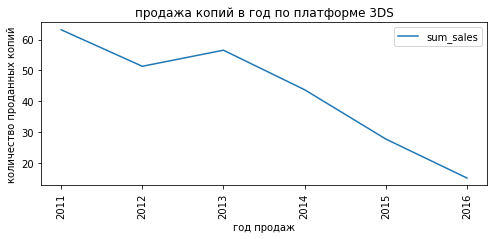

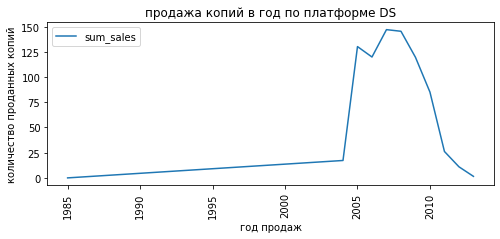

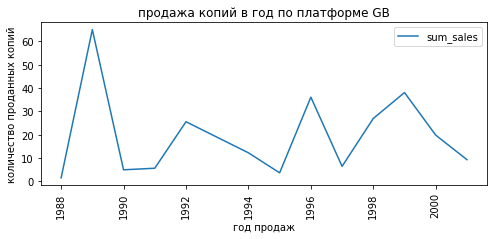

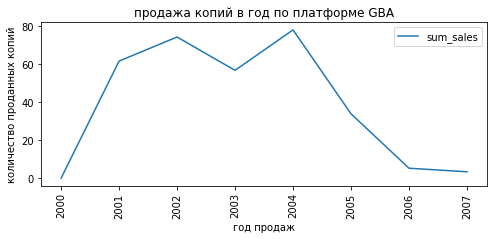

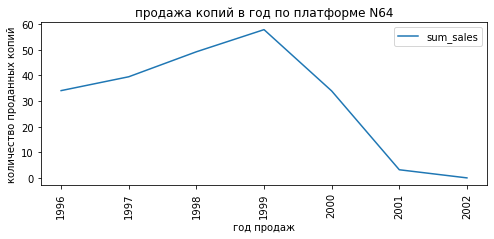

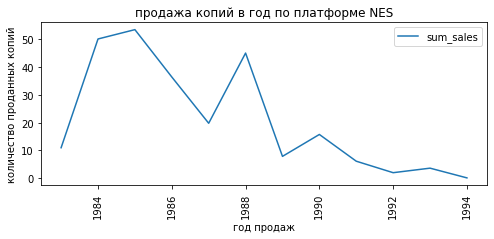

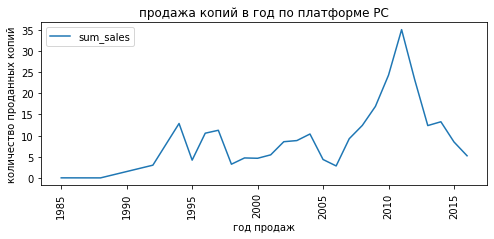

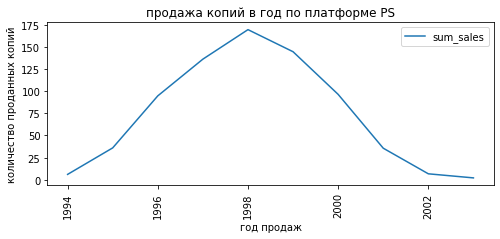

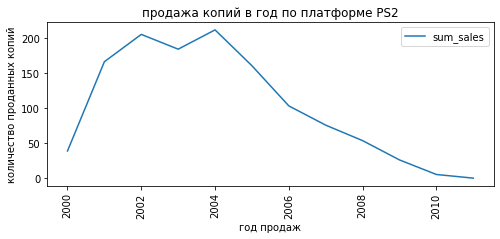

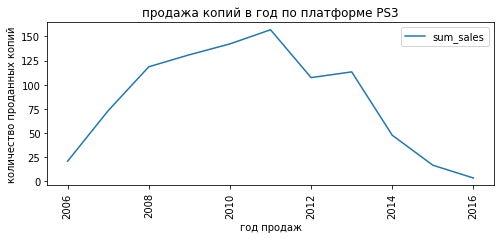

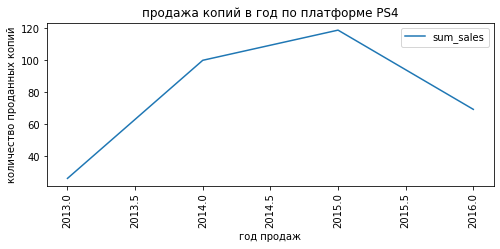

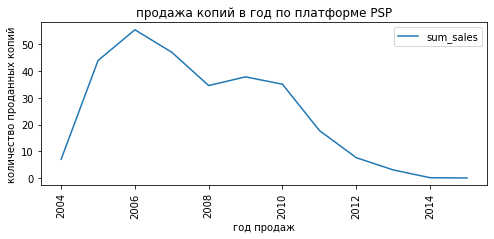

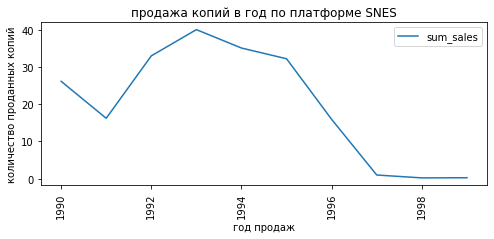

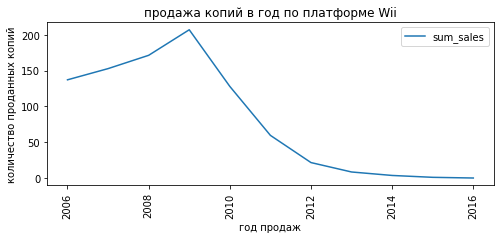

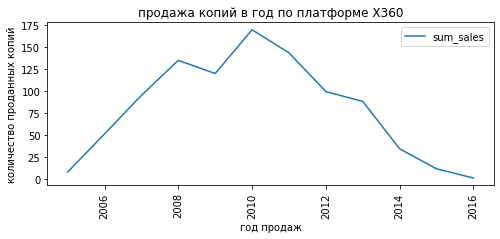

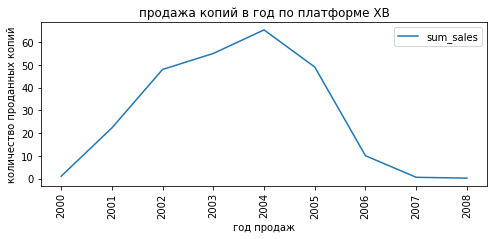

In [39]:
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


# строим графики для выбранных платформа продажам в год
for plat in plat_200:
    string = 'продажа копий в год по платформе ' + plat
    
    data_for_platform_sales.query('platform == @plat').plot(
        kind='line', x='year_of_release', y='sum_sales', figsize=(8, 3), rot=90)
    
    plt.title(string)
    plt.xlabel('год продаж')
    plt.ylabel('количество проданных копий')
    


Хоть и среднее время существования рынке игр и составляет около 11 лет. Именно активный цикл на который приходится наибольшее количество продаж составляем 6 - 8 лет. После чего платформа входит из моды и либо уходит с рынка совсем, либо составляем небольшую долю и от общего количества продажи и от своих продаж в прошлом. Кроме PC платформы. PС платформа используется для игра с самого начала и до настоящего времени.

Далее попробуем сделать прогноз на 2017 на основе предыдущего периода.
За актуальный период возьмём 2 года, т.к. рынок компьютерных игры быстро меняется, т.е. с 2014 года.

In [40]:
# посмотрим какие платформы сущесвутют с 2014 года по 2016
print('платформы', data.query('year_of_release >= 2014')['platform'].unique(), '\n')

print('количество платформ: ', data.query('year_of_release >= 2014')['platform'].nunique())


платформы ['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP'] 

количество платформ:  10


In [41]:
# выберем список платформ
platform_since_2014 = data.query('year_of_release >= 2014')['platform'].unique()

#проверка
platform_since_2014

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [42]:
# подсчитаем сумму суммарных продаж
data_for_platform_sales_2014 = data.query('year_of_release >= 2014')\
.pivot_table(index = ['platform', 'year_of_release'], values='sum_sales', aggfunc='sum').reset_index()

# проверка
data_for_platform_sales_2014

,platform,year_of_release,sum_sales
0,3DS,2014,43.76
1,3DS,2015,27.78
2,3DS,2016,15.14
3,PC,2014,13.28
4,PC,2015,8.52
5,PC,2016,5.25
6,PS3,2014,47.76
7,PS3,2015,16.82
8,PS3,2016,3.60
9,PS4,2014,100.00


In [43]:
platform_since_2014

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

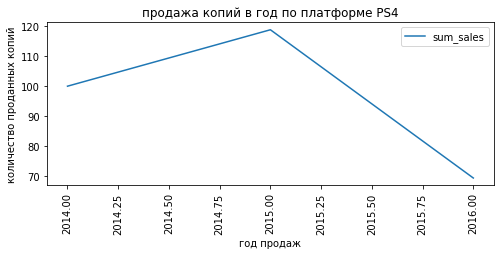

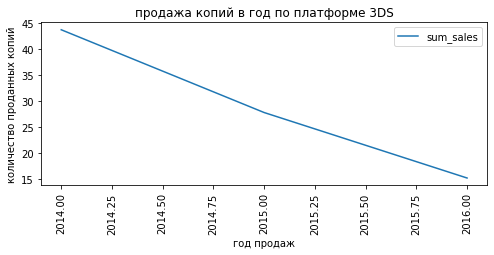

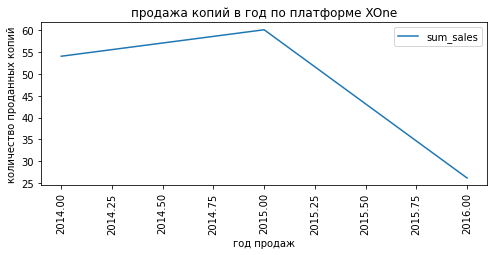

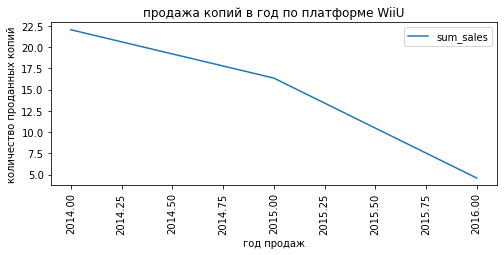

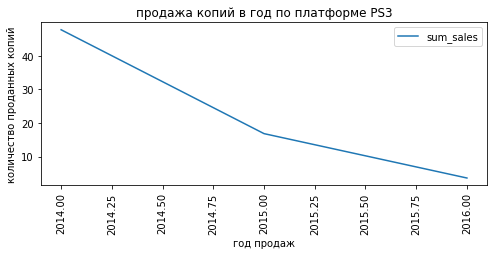

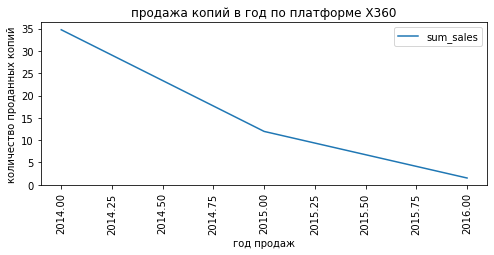

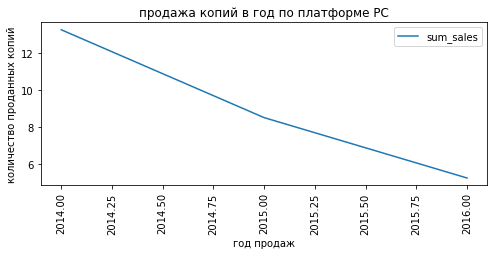

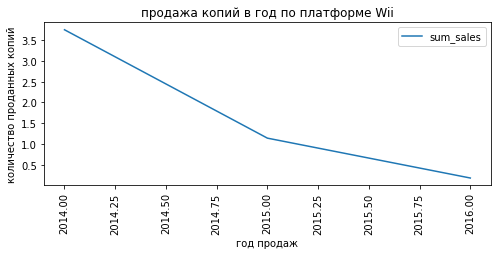

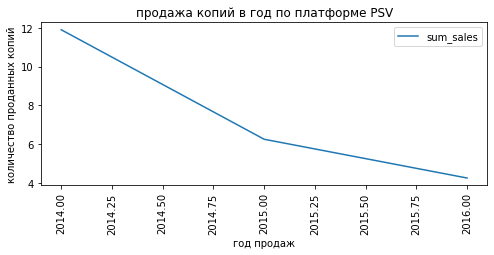

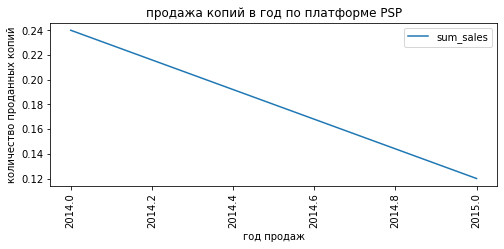

In [44]:
# построим графики для этих платформ
from IPython.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

for plat in platform_since_2014:
    string = 'продажа копий в год по платформе ' + plat
    
    data_for_platform_sales_2014.query('platform == @plat').plot(
        kind='line', x='year_of_release', y='sum_sales', figsize=(8, 3), rot=90)
    
    plt.title(string)
    plt.xlabel('год продаж')
    plt.ylabel('количество проданных копий')

Судя по графикам, часть платформ перестала пользоаться популрностью и игра для них будет продаваться или мало или не будет вовсе, это x360,  Wii, WiiU, PSP, . Продажи для их буду снижаться, даже если общие продажи начнут расти. 
Лучше себя чувствуют PS3, PSV  и PC, но на 2016 год продажи на них низки и скорее всего будут снижатс и далее. Возможен рост при общем росте продаж.
Самые популярные на данный момент: XONE, PS4, 3DS. На них продажи тоже будут скорее всего снижаться, т.к. общие продажи игр падают. Но если тенденция общей продажи игр изменится и начнёт расти, то возможно вполне веротно за счёт продаж на этих платформах.

Т.к. к 2017 году несколько платформ уже "умерло", можем увидть выход новых платформ на их замену. Во многом это зависит от состояния отрасли. Чем меньше продаж, тем менее интересо производитлям вкладываться в новые платформы. С другой стороны. Удачная новая платформа может подстегнуть интерес к индустрии и увеличить колиество продаж игр.

Самые потенциально прибыльные платформы это XONE, PS4 и 3DS. Построим для них диаграмму размаха по глобальным проадажам чтобы оценить, разброс. 

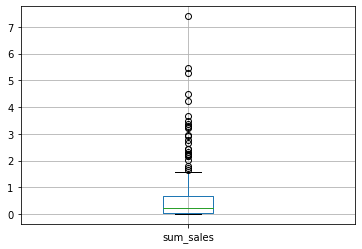

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: sum_sales, dtype: float64

In [45]:
# поситроим график размаха для XONE
data.query('platform=="XOne"').boxplot(column='sum_sales')
plt.show()
data.query('platform=="XOne"')['sum_sales'].describe()

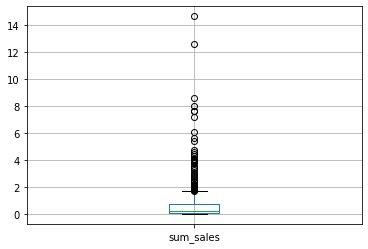

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: sum_sales, dtype: float64

In [46]:
# поситроим график размаха для PS4
data.query('platform=="PS4"').boxplot(column='sum_sales')
plt.show()
data.query('platform=="PS4"')['sum_sales'].describe()

Довольно много выбросов вверх. Половина всех продаж укладывается в диапазон от 0,06 млн. до 0,73 млн. копий. 

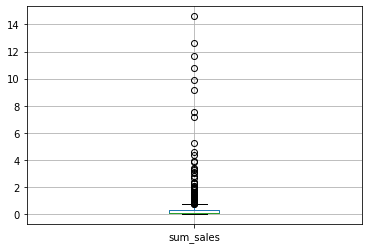

count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: sum_sales, dtype: float64

In [47]:
# поситроим график размаха для 3DS
data.query('platform=="3DS"').boxplot(column='sum_sales')
plt.show()
data.query('platform=="3DS"')['sum_sales'].describe()

Довольно много выбросов вверх. Из-за этого не видно самих "ящиков". Ограничим диапазон сверха и построим новые графики.

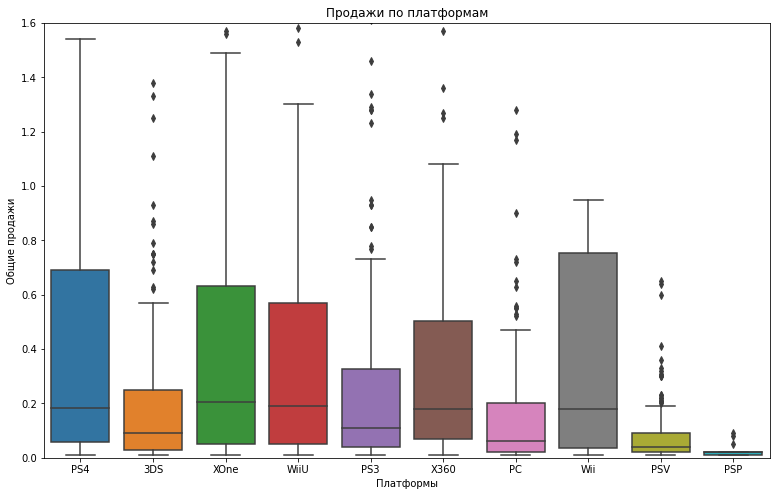

In [48]:
# построим диагармму размаха по платформам из актульаного периода
plt.figure(figsize=(13, 8))

data_sinse_2014 = data.query('year_of_release >= 2014')

sns.boxplot(data = data_sinse_2014, y = 'sum_sales', x='platform')\
.set(title = 'Продажи по платформам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 1.6))

plt.show()

Из графика виден разный разброс популярности и средняя популярность игр на разных платформах. Можем разделить платформы на две группы. В первой, куда входят PS4, XOne, WiiU, X360, Wii, в среднем у каждой игры продажи выше и выше разброс популярности, чем во второй группе, в которую входят: 3DS, PS3, PC, PSV, в которой разброс популярности и средние продажи игр ниже. На PSP игры продаются совсем мало относительно других платфомр.

Далее построим диаграмму рассеяния и посмотрим влияние отзывов пользователей и критиков на продажи внутри платформ XOne, PS4, 3Ds, сравним их с другими платформами, например PC, PS3, PSV, PSP и Wii  

корреляция по пользовательскому рейтингу плафтмормы:  XOne -0.06892505328279412
корреляция по рейтингу критиков плафтмормы: XOne 0.41699832800840175 

корреляция по пользовательскому рейтингу плафтмормы:  PS4 -0.031957110204556376
корреляция по рейтингу критиков плафтмормы: PS4 0.406567902061781 

корреляция по пользовательскому рейтингу плафтмормы:  3DS 0.22207843643390884
корреляция по рейтингу критиков плафтмормы: 3DS 0.34873973059848346 



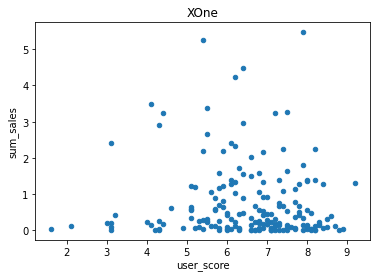

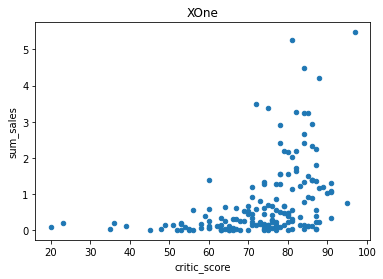

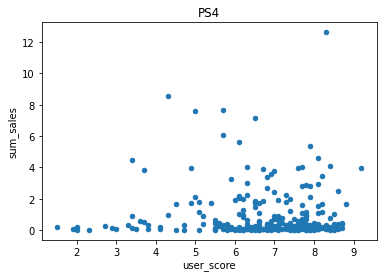

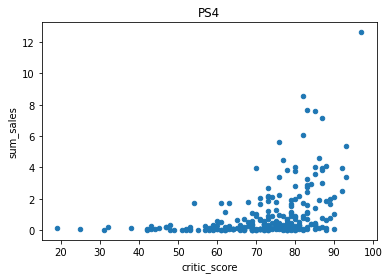

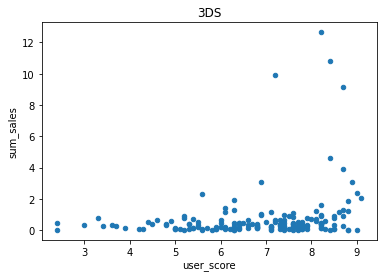

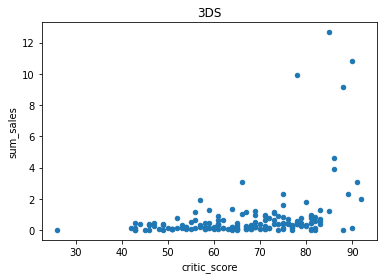

In [49]:
#создадим список платформ для сравнения
list_of_platforms = ['XOne', 'PS4', '3DS']

for platfom in list_of_platforms:
    # сортируем по платформе
    platform_score =  data.query('platform==@platfom')
    # строим диаграммы рассеяния
    platform_score[['sum_sales', 'user_score']].plot(kind='scatter', x='user_score', y='sum_sales', title = platfom)
    platform_score[['sum_sales', 'critic_score']].plot(kind='scatter', x='critic_score', y='sum_sales', title = platfom)
    
    #считаем и выводим корреляцию
    corr_user = platform_score['sum_sales'].corr(platform_score['user_score'])
    corr_critic = platform_score['sum_sales'].corr(platform_score['critic_score'])
    print('корреляция по пользовательскому рейтингу плафтмормы: ', platfom,  corr_user)
    print('корреляция по рейтингу критиков плафтмормы:', platfom,  corr_critic, '\n')

Можно сделать Вывод что отзывы пользователей на продажи XOne и PS4 почти не влияют, на продажи 3Ds влияют слабо. Отзывы критиков показывают среднюю корреляцию. И оказывают большее влияние на продажи чем оценки пользователей

Построим диаграммы и посчитаем корреляции и для некоторых других платформ, PC, PS3, PSV, PSP и Wii 

корреляция по пользовательскому рейтингу плафтмормы:  PC 0.012904741611451175
корреляция по рейтингу критиков плафтмормы: PC 0.25739471840098505 

корреляция по пользовательскому рейтингу плафтмормы:  PS3 0.12792603540158226
корреляция по рейтингу критиков плафтмормы: PS3 0.43371246722331125 

корреляция по пользовательскому рейтингу плафтмормы:  PSV 0.013488756835886498
корреляция по рейтингу критиков плафтмормы: PSV 0.13176292727608935 

корреляция по пользовательскому рейтингу плафтмормы:  PSP 0.22089026723044386
корреляция по рейтингу критиков плафтмормы: PSP 0.31752451005134863 

корреляция по пользовательскому рейтингу плафтмормы:  Wii 0.11283121360773771
корреляция по рейтингу критиков плафтмормы: Wii 0.17790728577594905 



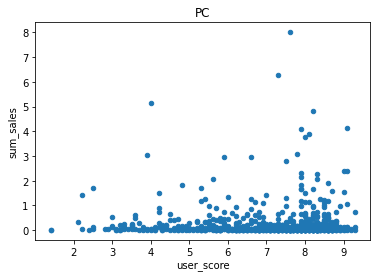

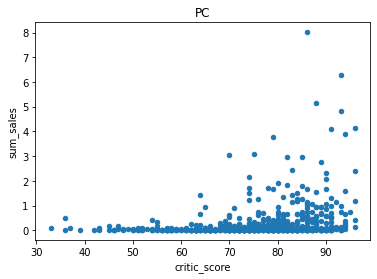

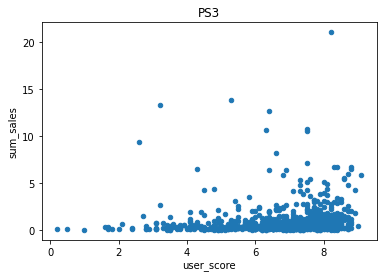

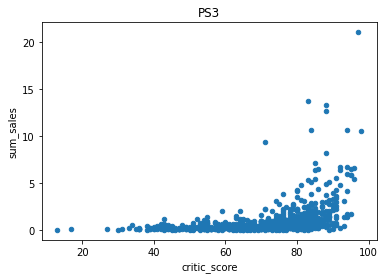

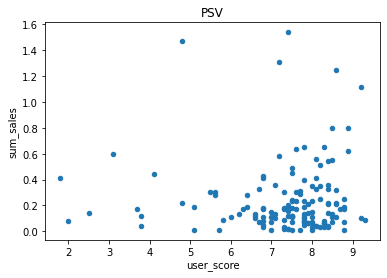

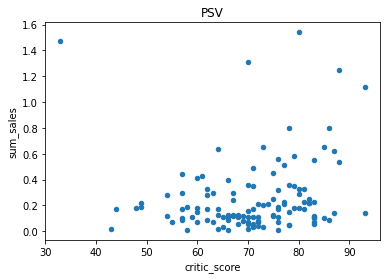

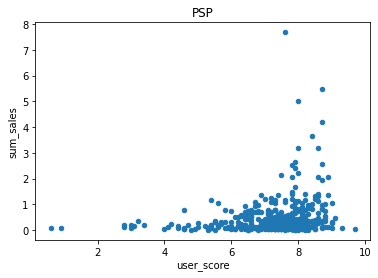

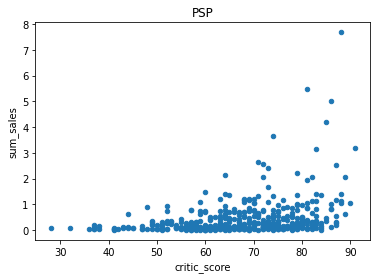

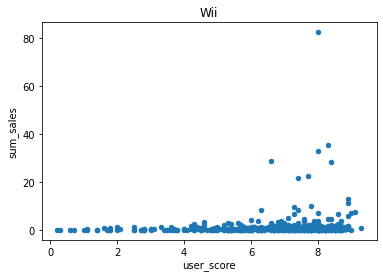

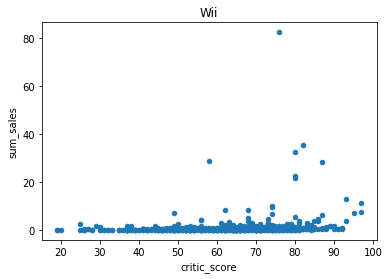

In [50]:
#создадим список платформ для сравнения
list_of_platforms = ['PC', 'PS3', 'PSV', 'PSP', 'Wii']

for platfom in list_of_platforms:
    # сортируем по платформе
    platform_score =  data.query('platform==@platfom')
    # строим диаграммы рассеяния
    platform_score[['sum_sales', 'user_score']].plot(kind='scatter', x='user_score', y='sum_sales', title = platfom)
    platform_score[['sum_sales', 'critic_score']].plot(kind='scatter', x='critic_score', y='sum_sales', title = platfom)
    
    #считаем и выводим корреляцию
    corr_user = platform_score['sum_sales'].corr(platform_score['user_score'])
    corr_critic = platform_score['sum_sales'].corr(platform_score['critic_score'])
    print('корреляция по пользовательскому рейтингу плафтмормы: ', platfom,  corr_user)
    print('корреляция по рейтингу критиков плафтмормы:', platfom,  corr_critic, '\n')

По остальным платформам тенденция схожая. Оценки пользователей влияют на продажи меньше, чем оценки критиков

Далее посмотрим на распределение игр по жанрам, возьмём актуальный период, с 2014 года.

Text(0, 0.5, 'количество выпущенных игр')

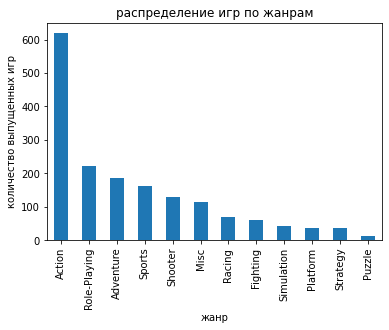

In [51]:
data_sinse_2014['genre'].value_counts().plot(kind='bar', title='распределение игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('количество выпущенных игр')

Больше всего выпущено игр (по количеству, не по продажам копий) в жанрах aсtion и adventure, меньшее всего  жанрах strategy и puzzle.

Найдём самые прибыльные жанры. Для этого построим график по жанрам и количеству проданных копий.

In [52]:
# соберём таблицу с суммой глобальных продаж по каждому жанру

data_genre_sales = data_sinse_2014.pivot_table(index='genre', values='sum_sales', aggfunc='median')\
.sort_values(by='sum_sales', ascending=False)


# проверка
data_genre_sales

,sum_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Text(0, 0.5, 'количество проданных копий игр')

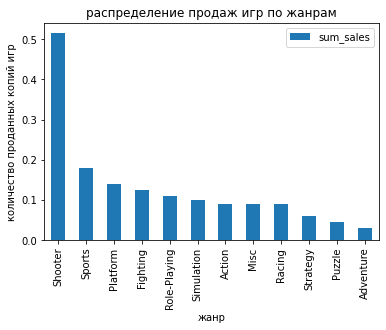

In [53]:
# распределяем по жанрам с 2014 года
data_genre_sales.plot(kind='bar', title='распределение продаж игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('количество проданных копий игр')

По продоваемости на первом месте - жанр shooter, на втором role-playing, причём игр жанра shooter в среднем примерно в два раза продаваемее игра с жанром role-playing. На предпоследнем месте жанр - adventure, на последнем - puzzle.
Продаваемость жанра shooter на порядок прибыльнее жанра puzzle.

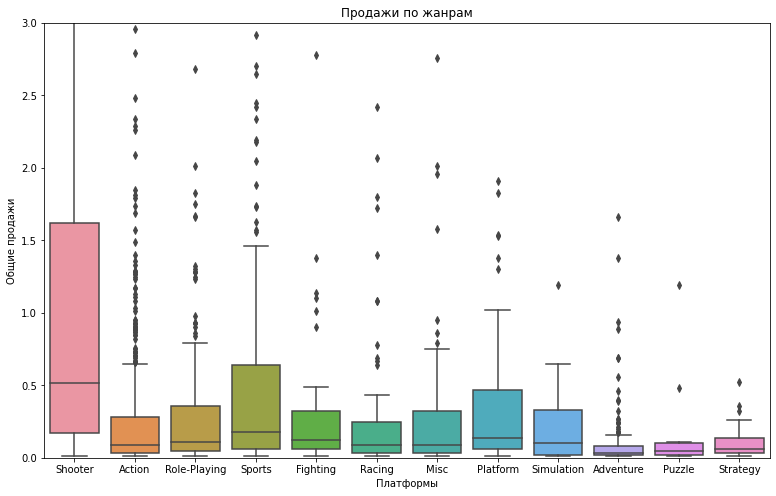

In [54]:
#Код ревьюера

import seaborn as sns



plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_sinse_2014, y = 'sum_sales', x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Платформы', ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

Самые высокие медианные значения по нисходящей у жанров: Shooter, Sports, Platform. Саме низки у жанров Strategy, Puzzle, Adventure. 
Заметно, что игры жанра шутер продаются в среднм заметно лучше игр других жанров. Интересно, что в жанре Action выпущенно примерно в 6 раз больше игр, чем игр жанра Shooter. При этом медианные продажи жанра Shooter примерно в 6 раз выше медианных продаж жанра Action.

## 4. Составление портрета жителя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5).

Чтобы точнее составить потрет возьмём данные за последние два года в таблице, с 2014 по 2016.

Начнём с региона NA, Северная Америка.

In [55]:
# отсортируем таблицу по платформе и продажам в регионе NA
data.query('year_of_release >= 2014').pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


Самая популярная платформа это PS4, за ней идёт с отрывом почти в 20% от продаж, XOne, дальше с большим отрывом в 70%-80% от первой - X360, 3Ds и замыкает PS3. На первую платформу приходтся больше чем на последние три. 

Следующий регион EU, Европейский союз.

In [56]:
# отсортируем таблицу по платформе и продажам в регионе EU
data.query('year_of_release >= 2014').pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


В Европейском союзе. Так же лидирует PS4, но уже с большим отрывом от остальных. После PS4 идёт XOne, на которую продано только 35% копий от PS4, далее PS3 - около 19% от PS4, дальше персональные комьпютеры, PC в 14% от PS4 и наконец 3Ds в 12% от PS4. В Европейской регионе на PS4 приходится больше продаж копий игр чем на остальные четыре в сумме.


Следующий регион - JP, Япония

In [57]:
# отсортируем таблицу по платформе и продажам в регионе JP
data.query('year_of_release >= 2014').pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


В Японии на первом мест платформа 3Ds, на втором в 30% оn первого идёт PS4, с небольшой разницей на третьем месте PSV, в 25% от первого идёт PS3 и на последнем в 15% замыкает WiiU

Следующим пунктом посмотрим на самые популярные жанры в тех же регионах (NA, EU, JP)

In [58]:
# отсортируем таблицу по жанрам и продажам в регионе NA
data.query('year_of_release >= 2014').pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


В Северной Америке самый популярный жанр Shooter (стрелялка, анг. стрелок), за ним по порядку идут Action (анг. действие), Sports (анг. спортивные состязания), Role-Playing (анг. ролевые игры), Misc (анг. разное)

In [59]:
# отсортируем таблицу по платформе и продажам в регионе EU
data.query('year_of_release >= 2014').pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


В Европейском Союзе почти тот же набор. На первом месте Action, за ним по порядку идут Shooter, Sports, Role-Playing, Racing (анг. гонки)

In [60]:
# отсортируем таблицу по платформе и продажам в регионе JP
data.query('year_of_release >= 2014').pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


В Японии набор отличается сильнее. На первом месте жанр Role-Playing за ним по порядку: Action, Fighting (анг. драка) , Misc, Shooter

Веротно отличия можно объснить различными предпочтения в следсвии различной культуры. Культурно жители Северной Америки и Европейского союза более схожи между собой, чем с Японией.

Проверим зависимость продаж в тех же регионах (NA, EU, JP) от рейтинга ESRB 

Text(0, 0.5, 'количество проданных копий')

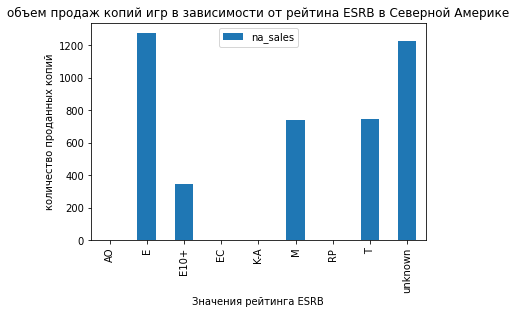

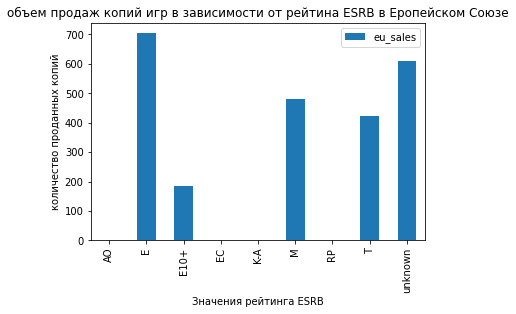

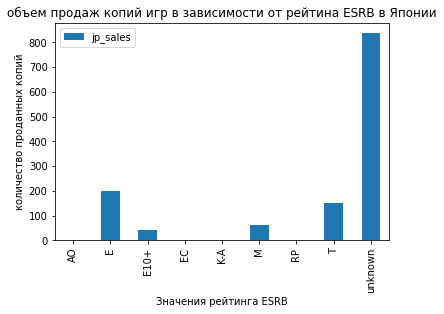

In [61]:
# отсортируем таблицы по рейтингу и продажам

# по NA
data.pivot_table(index='rating', values='na_sales', aggfunc='sum').plot(kind='bar',
    title = 'объем продаж копий игр в зависимости от рейтина ESRB в Северной Америке')
plt.xlabel('Значения рейтинга ESRB')
plt.ylabel('количество проданных копий')

# по EU
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').plot( kind='bar',
    title = 'объем продаж копий игр в зависимости от рейтина ESRB в Еропейском Союзе')
plt.xlabel('Значения рейтинга ESRB')
plt.ylabel('количество проданных копий')

# по JP
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').plot(kind='bar',
    title = 'объем продаж копий игр в зависимости от рейтина ESRB в Японии')
plt.xlabel('Значения рейтинга ESRB')
plt.ylabel('количество проданных копий')

Больше всего похоже распределение между Северной Америкой и Европейскоим союзом. Интересно, что значительную часть составляют игры без рейтинга ESRB.  Японии продукция категории "M", пользуется меньше популярностью, чем игры той же категории в других регионах, а также заметно, что игры без рейтинга составляют большинство продукции именно в этом регионе. Это может говорить как о том, что в Японии популярны другие игры, чем в других регионах, так и о том, что в Японии есть много игр, которые не попадают в другие регионы.

# 5. Проверим гипотезы

Сравним пользовательские рейтинги платформ Xbox One и PC. Возьмём данные за актуальный период, с 2014 по 2016 годы

Нулевая гипотеза, H0: Средние пользовательские рейтинги платформы Xbox One равны пользовательским рейтинга платформы PC.

Альтернативная гипотеза H1: Средние пользовательские рейтинги платформы Xbox One отличаются от пользовательских рейтингов платформы PC.

Уровень статистической значимости - 5% 

In [62]:
# проверка гипотезы

# удалим пропуски
data_dropna_score = data.dropna(subset=['user_score'])
# соберём таблицы для сравнения и присвоим переменным
xbox_one_score = data_dropna_score.query('year_of_release >= 2014 and platform == "XOne"')['user_score']
pc_score = data_dropna_score.query('year_of_release >= 2014 and platform == "PC"')['user_score']

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    xbox_one_score, 
    pc_score)

print('среднее значение по пользовательским рейтингам Xbox One: ', xbox_one_score.mean())
print('среднее значение по пользовательским рейтингам PC ', pc_score.mean(),'\n')
print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Не принемаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу') 


среднее значение по пользовательским рейтингам Xbox One:  6.594545454545456
среднее значение по пользовательским рейтингам PC  6.298360655737705 

p-значение: 0.10450507919348415
Принимаем нулевую гипотезу


Принимаем нулевую гипотезу H0. Среднние пользовательские рейтинги платформ Xbox One и PC равны.

Следующая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза H0: Средние пользовательские рейтинги жанра Action равны среднием пользовательским рейтингам жанра Sports.

Альтернативная гипотеза H1: Средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингав жанра Sports.

In [63]:
# проверка гипотезы

# соберём таблицы для сравнения и присвоим переменным
action_one_score = data_dropna_score.query('year_of_release >= 2014 and genre == "Action"')['user_score']
sports_score = data_dropna_score.query('year_of_release >= 2014 and genre == "Sports"')['user_score']

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(
    action_one_score, 
    sports_score)

print('среднее значение по пользовательским рейтингам жанра Action: ', action_one_score.mean())
print('среднее значение по пользовательским рейтингам жанра Sports ', sports_score.mean(),'\n')



print('p-значение:', results.pvalue)


if results.pvalue < alpha:
    print('Не принемаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу') 


среднее значение по пользовательским рейтингам жанра Action:  6.760606060606061
среднее значение по пользовательским рейтингам жанра Sports  5.2251968503937 

p-значение: 2.8711147985105864e-19
Не принемаем нулевую гипотезу


Нулевую гипотезу не принимаем. Принимаем альтернативную гипотезу H1, похоже, что средине пользовательские рейтинги жанров Action и Sports различны.

При формулировке гипотез нулевой гипотезы использовал равенство параметров, т.к. в описании гипотезы стоит вопрос о равенстве параметров и не стоит вопроса в какую сторону больше или меньше. Следовательно альтернативная гипотеза сформулирована как неравенсво. Так как от на не требуется степени сравнения в большую или в меньшую строну, то критерий сравнений выбран двусторонний.

# 6. Итоговый вывод

С 1980 по 1993 количество выпущенных игр в год менялось слабо и было около 50 в год. После 1993 года начался рост выпуска игр. Большинство игр было выпущено с 2000 по 2016 годы с пиком в 2007 годы после которого выпуск игр пошёл на спад.

Средний возраст платформы около 11 лет. Т.е. от первого появления игры для платформы по полного или почти полного прекращения выпуска игры для платформы проходит около 11 лет. Исключением являются персональные компьютеры. Для них игры выпускаются всю время существования индустрии. Большинство игры для платформы выпускается в течение 6ти-летнего периода от этого срока.

В прогнозе на 2017 ожидается полное прекращение или минимальны выпуск игры для теряющих популярность платформ таких как PS2, PSP, Wii и других. Скорее всего продолжиться спад отрасли. Есть вероятность появления новых игровых платформ в замен новых. Что может повлечь за собой некоторое оживление, т.к. под новые платформы выпускаются новые игры или перевыпускаются старые.

В процессе исследования выяснилось что оценки пользователей очень слабо влияют на продажи. Сильнее влияют оценки критиков.

Больше всего выпущено и продано игр в жанрах Action(анг. действие) и Sports(анг. спортивные состязания), эти два жанра занимают первое и второе место соответственно. На последних местах жанры: strategy(анг. стратегия), puzzle(анг. головоломка) и adventure(анг. приключение)

Самые популярные платформы в Северной Америке и Европейском Союзе - PS4, в Японии - 3DS.

Самые популярные жанры в Северной Америке - Shooter и Action и Европейском Союзе - Action и Shooter в Японии - Role-Playing и Action(анг. ролевые игры)
Отличия в предпочтениях игровых платформ и жанров вероятно обусловлены культурными особенностями. 

Тем же можно объяснить различия в зависимости продаж от рейтинга ESRB, В исследуемых трёх регионах пропорции продаж по категориям рейтинга очень схожи с одним исключением, что в Японии игры категории "M" - для взрослых пользуются меньшим спросом, чем в Америке и Европе.

Проверив две гипотезы, выяснили, что средние пользовательские рейтинги платформы Xbox One равны пользовательским рейтингам. И средние пользовательские рейтинги жанра Action отличаются от средних пользовательских рейтингов жанра Sports.

Интересно было бы получить данные вплоть до 2022 - 2023 годов. Проверить прогноз на 2017 год, рассмотреть другие регионы.

Вероятно это одобрят не во всех компаних, но хочется сделать немного приятно своему ревьюеру, поэтому добавлю котика: